This is a visualization I made in the Codecademy Data Science Path with a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

In [1]:
#First we import what we need for the analysis and visualization.
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#We read in the data from Kaggle (which I learned of thru Codecademy)
df = pd.read_csv("kiva_data.csv")

In [3]:
#Now we just want to get a sense of the data frame.
df.head(10)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


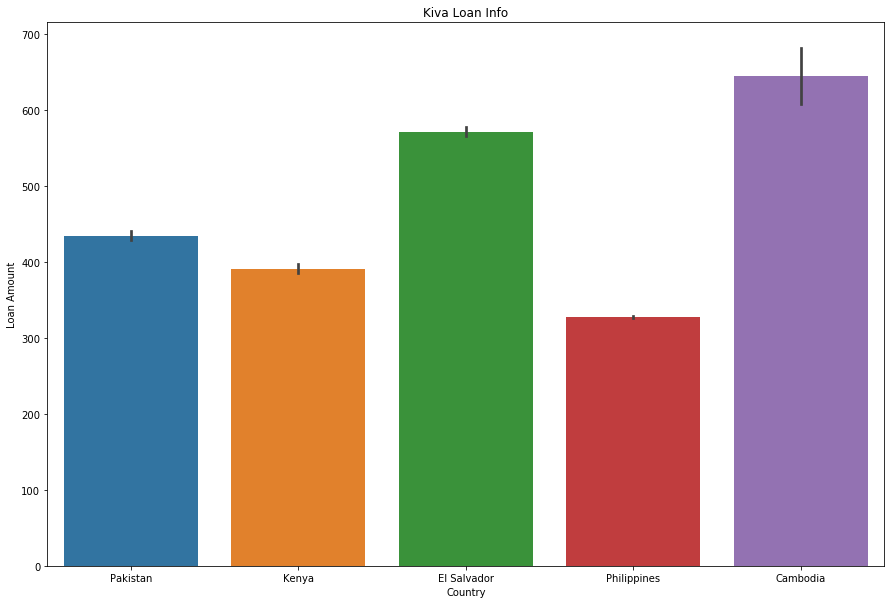

In [4]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data = df, x = 'country', y = 'loan_amount')
ax.set(title='Kiva Loan Info',xlabel='Country', ylabel='Loan Amount')

plt.show()


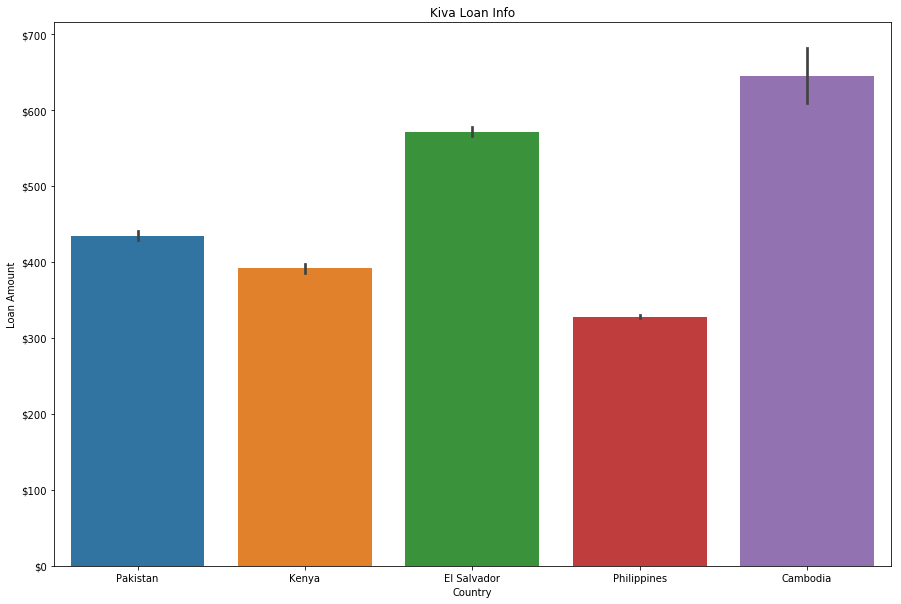

In [5]:
#We can bring this in to format the y ticks.
import matplotlib.ticker as mtick

#This gives us the tools to control the axes and the size of the figure.
f, ax = plt.subplots(figsize=(15, 10))

#We bring in seaborn on top of matplotlib to summarize the data. 
#This will give us an average for each loan amount.
sns.barplot(data=df, x="country", y = "loan_amount")

#This next block of code I got from Codecademy, and it puts "$" signs in the y axis. 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#Just cleaning up the axes and the title.
ax.set(title='Kiva Loan Info',xlabel='Country', ylabel='Loan Amount')

#Let's save an image
plt.savefig('kiva_loan_info_general.png')

plt.show()


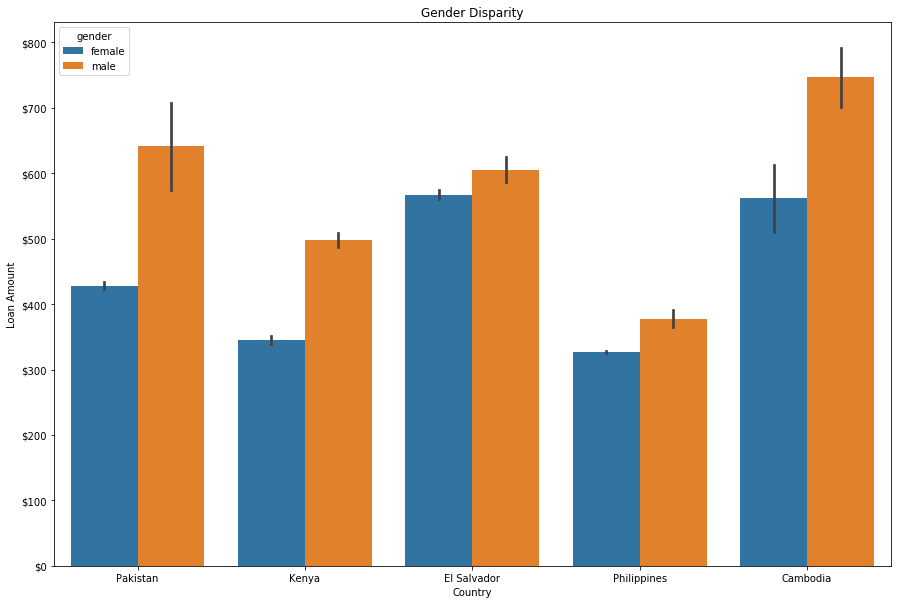

In [6]:
#We are now going to bring down the code from above, but add a hue for gender. This will\
#nest the data by gender, and we can see if there any disparities. Hint: we are going to see\
#a big disparity.

f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df, x="country", y="loan_amount", hue="gender")
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.set(title='Gender Disparity',xlabel='Country', ylabel='Loan Amount')
plt.savefig('kiva_loan_gender_disparity.png')
plt.show()

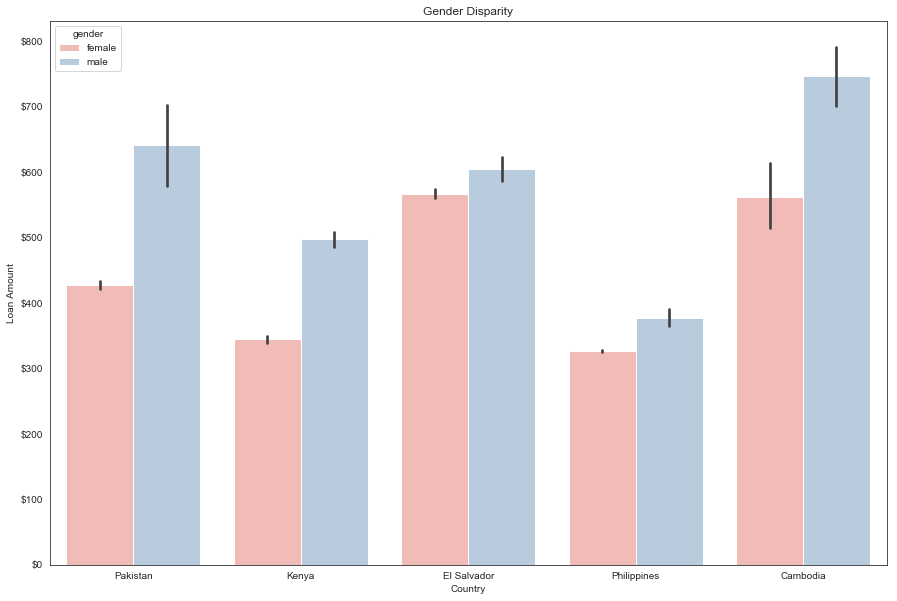

In [7]:
#I'm now going to change the colors a bit.

#Change the color palette using a Color Brewer set.
sns.set_palette('Pastel1')

#Change the style.
sns.set_style('white')

# Create figure and axes (nonee d to use the previous syntax, as the y-label ticks aren't going to be formatted)
f, ax = plt.subplots(figsize=(15, 10))

# Add a title
plt.title("Gender Disparity")

# Use Seaborn to create the bar plot
sns.barplot(data=df, x="country", y="loan_amount", hue="gender")

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#Label the axes
plt.xlabel("Country")
plt.ylabel("Loan Amount")

#seems not to be needed in Jupyter Notebooks, where I wrote this, but cleans it up:
plt.savefig('kiva_loan_info_general_redblueformatted.png')
plt.show()


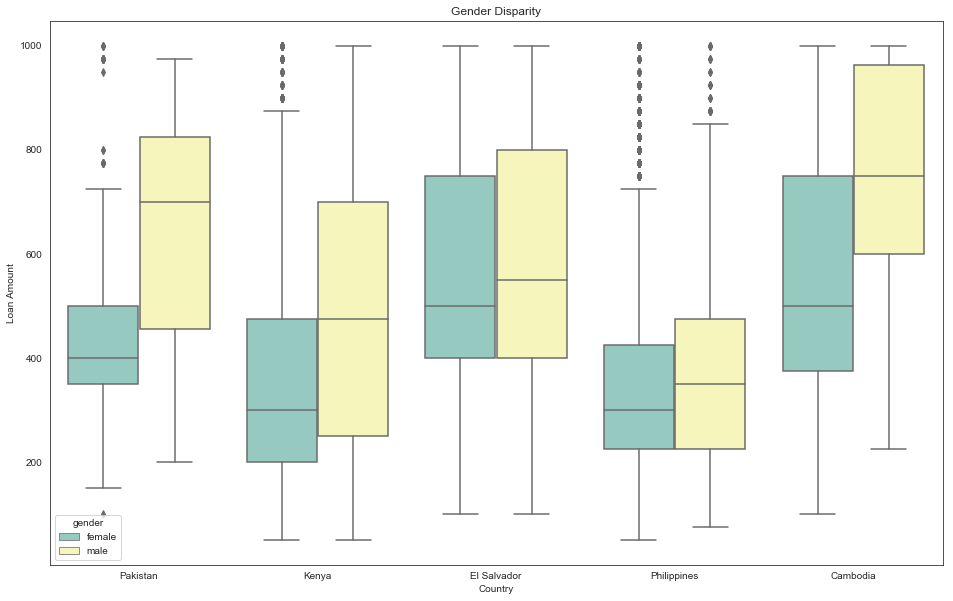

In [8]:
#Let's check what the distribution of the data might be using boxplots.
plt.figure(figsize=(16, 10))
sns.set_palette('Set3')
plt.title("Gender Disparity")
sns.boxplot(data=df, x="country", y="loan_amount", hue="gender")
plt.title("Gender Disparity")
plt.xlabel("Country")
plt.ylabel("Loan Amount")
plt.savefig('kiva_loan_gender_disparity_boxplots.png')
plt.show()

You can really see how stark the divide is in Cambodia and Pakistan. 

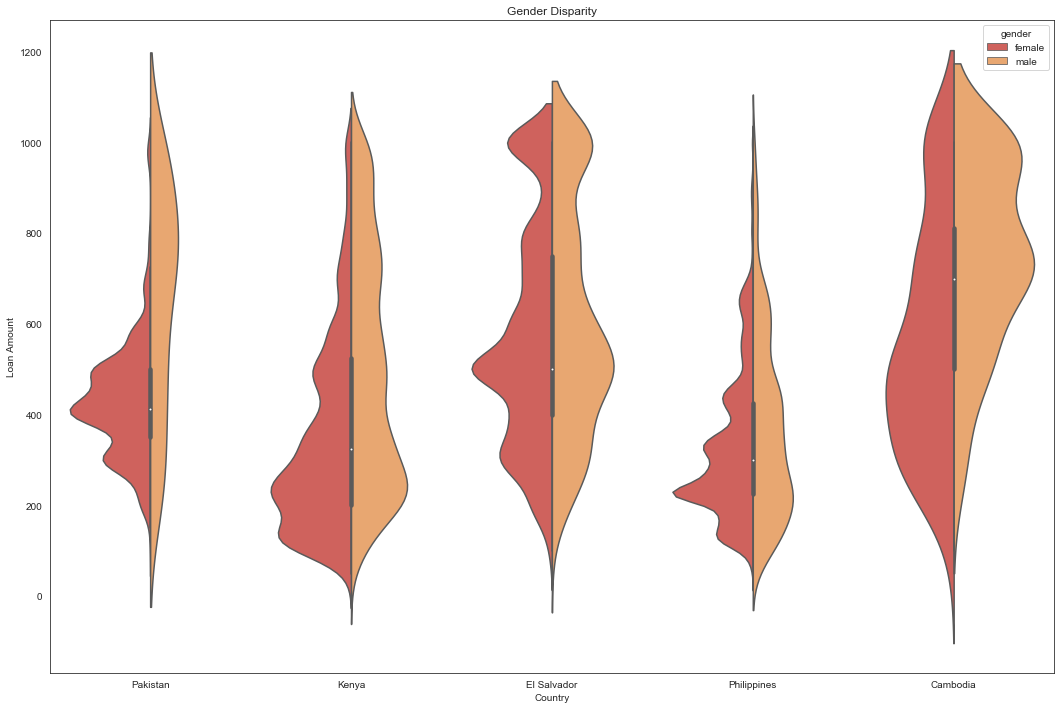

In [9]:
#We can apply new styling, change the figure size, and add the 'split = True' command to try
#to get the information of a box plot, with some of the median info, a visual idea of where 
#an average migth be (fattest part of the violin ish), and also the distribution. The split=
#True command I learned in Codecademy.
sns.set_palette("Spectral")
plt.figure(figsize=(18, 12))
sns.violinplot(data=df, x="country", y="loan_amount", hue= 'gender', split=True)
plt.title("Gender Disparity")
plt.xlabel("Country")
plt.ylabel("Loan Amount")
plt.savefig('kiva_loan_gender_disparity_violinplots.png')
plt.show()

You can see here that in the case of Pakistan and Cambodia, the woman (represented by the red) are bunched up lower down the loan amount scale than the men are (represented by the orange). On the other hand, you can see that in El Salvador, the disparity is much less. 

Here, we can use the data from the lines of numbers to start to tell a story. And that story can spur action: there should be an analysis of why this disparity exists and any discriminatory practices should be stopped. A loan program desgined with women in mind, or outreach specifically for woman should also be considered. 

Note: I've only seen a snapshot of the data from the Codeacademy course, and the thoughts are derived only from the data that I have seen in the project, as reflected above. There may be more data, relevant, that I'm not aware of. In any event, there does seem to be a disparity that should be remedied.